# Distributions and Sampling with NumPy

[NumPy](https://numpy.org/) Is a fundamental package for scientific computing with Python including statistical methds for quantitative analysis.

#### Learning objectives
 By the end of this notebook you will know:
+ What are vectors and how they can be represented
+ How to create data from theoretical distributions
+ How to use functions for sampling vectors
---

## **1. Vector representation**:
- Vectors are a type of mathematical matrix having only one column or one row.
- Vectors come in two flavors: column vectors and row vectors. For example, matrix a is a column vector, and matrix a' is a row vector.

![](../../semester1/pics/vectors.png)

- There are two Python data structures that can represent vectors: **Arrays** and **Lists**

**Note:** Whether it is a row or column, vectors on Python will be shown in a horizontal form, from left to right.


### List
- A collection of elements in a vector, not nescesarrily of the same type (which is its main advantage, one can store any type of data structure in it).
- The elements in a list are indexed with 0 being the first index.
- A **List** is the standard ordered-sequence data structure in Python. 
- No external package is needed to create and read **Lists**

A list is created simply by adding elements inside squared brakets`[ ]`

In [1]:
my_list = [11, 12, 33, 40.5]
print(my_list)

[11, 12, 33, 40.5]


And it can contain numbers and strings (words)

In [2]:
weird_list = ['a','b','c','d',1,2,3,2,4]
print(weird_list)

['a', 'b', 'c', 'd', 1, 2, 3, 2, 4]


Once a list is defined, we can access its elements using the indexing method `[ ]` (no space)

In [3]:
weird_list[2]

'c'

We can check that indeed some elements in the same list are not of the same type

In [4]:
print(type(weird_list[2]), type(weird_list[5]))

<class 'str'> <class 'int'>


Nevertheless, one can slice a subset of the list

In [5]:
weird_list[2:6]

['c', 'd', 1, 2]

But most importantly, one can extend a list with new values using `extend()` function

In [6]:
weird_list.extend(["Dua Lipa", "We're good"])

In [7]:
print(weird_list)

['a', 'b', 'c', 'd', 1, 2, 3, 2, 4, 'Dua Lipa', "We're good"]


### Array
- A more efficient way to store an ordered set (vector) of elements of the same type.
- For efficient computation, NumPy arrays are far more suitable 
- To use arrays is necessary to import the Numpy library, e.g., `import numpy as np`

An array is created using the `np.array()` function from NumPy libray (using the same vector)  
**Note:** We need to use both parentheses and square brackets

In [8]:
import numpy as np

my_array = np.array([11, 12, 33])
print(my_array)

[11 12 33]


But introducing different types of data, things may change

In [9]:
np.array([11, 12, 33, "Billie Eilish"])

array(['11', '12', '33', 'Billie Eilish'], dtype='<U21')

Do you see what happened? Python automatically typecast all of the elements in the array to be of the same type. 

The main advantage is that one is able to make math operations easily

In [10]:
# 3 times each element of the array 
3 * my_array

array([33, 36, 99])

In [11]:
# substracting 10
my_array - 10

array([ 1,  2, 23])

An array can be converted to a List by simply using the `list()` function

In [12]:
new_list = list(my_array)

print(new_list)

[11, 12, 33]


## **2. Data from Theoretical Distributions**:
- Theoretical probability distributions are a mathematical construction of a random variable that describes phenomena in terms of their probabilities of events, there are [many of them](https://en.wikipedia.org/wiki/List_of_probability_distributions)!
- The main library to perform Statistical analysis in Python is [SciPy (Scientific Python)](https://www.scipy.org/) 
- SciPy builds on NumPy, and for all basic array handling needs you can use NumPy functions.

**Note:** SciPy library is huge, therefore, we might not want to import the whole library but the functions that we need in that moment, for example, to import the Normal distribution `from scipy.stats import norm` 

### Normal Distribution

- A probability distribution in which the random variable X can take any value is a **continuous** random variable, the Normal distribution is a type of **continuous** random variable.
- The location (`loc`) parameter specifies the `mean`. The scale (`scale`) parameter specifies the `standard deviation`.
- See [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) for more details

A continuous random variable $X$ can be "*The mean daily temperature of Maastricht in April*". Let's suppose that we know the daily temperature in April is distributed Normal with `mean = 11.5` and `sd = 5.5` (i.e. between 6 and 17 Celsius on most of days).
- We can generate random values that are representative the real data, we just have to specify the size of the sample that we want to generate.  

For a `size` of 30 days:

In [24]:
from scipy.stats import norm

X = norm.rvs(loc=11.5, scale=5.5, size=30)
print(X)

[ 6.59092952 11.18290282 10.00365814 12.67315034 10.94069607  9.22013015
 13.02536913  3.41854629  4.06465594 14.1666125  13.02764729 10.48631353
 11.19810551  7.78041964 15.84676763 10.83022771  9.52741854  5.95896371
  7.98452654 13.4810802   8.66413205 16.88620593 11.28109943 10.42915686
 -1.65676691 10.14086557  4.43826572 10.82634925 14.35960857 19.08090897]


Did we just kinda predict the weather?

To get an idea of whether or not the data we generated has a Normal dstribution, we can quickly see if it has the expected bell curve by plotting it.

(array([1., 0., 3., 2., 3., 6., 7., 5., 2., 1.]),
 array([-1.65676691,  0.41700068,  2.49076827,  4.56453585,  6.63830344,
         8.71207103, 10.78583862, 12.85960621, 14.9333738 , 17.00714138,
        19.08090897]),
 <a list of 10 Patch objects>)

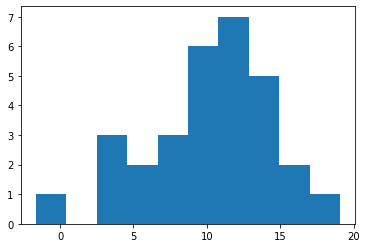

In [25]:
import matplotlib.pyplot as plt

plt.hist(X)

**Note:**
- If the mean and sd are not specified then it will take the default values of 0 and 1. (a.k.a. **Standard Normal Distribuition**)
- By adding the parameter `random_state` we can reproduce the same generated values if the code is run again, random state is also called **seed**. This number can be anything you want (e.g the number of the beast)

In [15]:
norm.rvs(size=50, random_state=666)

array([ 0.82418808,  0.479966  ,  1.17346801,  0.90904807, -0.57172145,
       -0.10949727,  0.01902826, -0.94376106,  0.64057315, -0.78644317,
        0.60886999, -0.93101185,  0.97822225, -0.73691806, -0.29873262,
       -0.46058737, -1.08879299, -0.57577075, -1.68290077,  0.22918525,
       -1.75662522,  0.84463262,  0.27721986,  0.85290153,  0.1945996 ,
        1.31063772,  1.5438436 , -0.52904802, -0.6564723 , -0.2015057 ,
       -0.70061583,  0.68713795, -0.02607576, -0.82975832,  0.29655378,
       -0.3126795 , -0.61130127, -0.8217515 ,  0.8971227 ,  0.13607861,
       -0.2586548 ,  1.11076564, -0.18842439, -0.04148929, -0.98479191,
       -1.35228176,  0.19432385,  0.26723935, -0.4264737 ,  1.44773506])

### Poisson Distribution

- A probability distribution in which the random variable X can only take integer values is a **discrete** random variable. the Poisson distribution is a type of **discrete** random variable.
- Poisson distribution takes as `shape` parameter `mu`. When $\mu = 0$ then method returns 1.0.
- See [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) for more details

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time (when that time interval is regular). An example can be: Let $X$ be the "Number of goals scored in a Football match" *. Let's supose that we know `mu = 3` (i.e., 3 goals expected in total).
- We can generate random values that are representative of the real data, we just have to specify the size of the sample that we want.  
With a `size` of 60 matches:

In [16]:
from scipy.stats import poisson

X = poisson.rvs(mu=3, size=60)
print(X)

[2 2 3 3 2 3 3 2 2 4 4 5 5 3 4 2 1 1 0 3 5 3 3 1 6 5 3 3 5 4 5 4 2 3 2 0 2
 0 5 3 2 2 4 4 4 2 4 5 5 4 1 4 3 4 3 3 0 2 3 2]


Did we just kinda predict the results of the season?

## **3. Simple Random Sampling**
- In a nutshell, random sampling is a technique in which we sample each element with a specified probability. 
- Often we perform a simple random sample by sampling uniformly-at-random such that each element has an equal probability of being chosen.
- The main goal of simple random sampling is to have an unbiased representation of the total population. Differences between the sample and the population are called sampling errors.

**Note:** There are many other techniques for sampling depending on the experiment, however, we are focusing on simple random sampling using `random.sample()` from the Random library 

Given a vector Y of 10 consecutive numbers, we can sample 4 of them making sure that all the elements have the same chances

In [17]:
#import the library
import random 

#this is just a vector represented as a list
Y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

# use the function sample on the vector Y to select 3 elements
random.sample(Y, 4) 

[7, 2, 5, 3]

It is also possible to sample non numerical elements in a vector

In [18]:
# yet another vector
netflix = ["Luis Miguel", "New Amsterdam", "Lupin", "Shtisel", "Taco Chronicles", "The Queen's Gambit", 
           "Too Hot to Handle", "The Crown", "Rick and Morty", "Anne+", "Selling Sunset", "Vikings"] 

random.sample(netflix, 2) 

['Too Hot to Handle', 'Taco Chronicles']

It seems that this function can come in handy when there's no agreement on what to watch this weekend!

But most importantly, in case we want to repeat the exact same random sample, we need to set a seed using `random.seed()` function **right before** the `random.sample()` function is executed

In [19]:
random.seed(1113)
random.sample(netflix, 2) 

['Luis Miguel', 'Vikings']

Now the specific sample is fixed and no-one can change their mind :)

---
<i style="color:red">EXERCISES</i>

+ _1. When we print `my_list` and `my_array` it appears to produce the same result. How would you check the type of data structure for each one?_

```python
my_list = [11, 12, 33]
print(my_list)

my_array = np.array([11, 12, 33])
print(my_array)
```
___

+ _2. Define two vectors $X$ and $Y$, with a set of 5 numbers of your choice. Then perform the following operation $(X + Y) / 2$. Is it possible to make this operation with both Lists and Arrays? if not why?_
___

+ _3. Let's say that I do want to import the whole stats library and then use the Uniform distribution_

```python
import scipy.stats as stats
```

Why is the following function not working anymore? Make the appropiate changes to fix the problem.

```python
uniform.rvs(size=100)
```
___

+ _4. All of the following 3 functions generate a sample of 20 random numbers from a Normal distribution with `mean = 10` and `sd = 5`. 
They have the same parameters, but do they produce the same results? What are the differences or similarities among them?_

```python
norm.rvs(10, 5, 20)

norm.rvs(loc=10, scale=5, size=20, random_state=2021)

norm.rvs(random_state=2021, scale=5, loc=10, size=20)
```
___

+ _5. Given the following vector in an array form. Explore why it cannot be sampled. How do you fix this?_

```python
V = np.array([0, 1, 2, 3, 4, 5])
random.sample(V, 2) 
```
___

+ _6. Given a vector $V$ that can be any size, write a function that automatically samples 20% of the elements from the vector $V$._

Hint: 
- Use the `len()` function
- You can define $V$ as you want
___